In [1]:
from setup_env import setup_environment

setup_environment()

In [2]:
from project.config import DATA_SOURCE
from project.wfc.repository import repository
from project.wfc.factory import Factory
from project.wfc.grid import Grid
from project.utils.rectangulator import Rectangulator
from project.utils.graph_builder import GraphBuilder


factory = Factory(DATA_SOURCE)
patterns = factory.create_patterns()
grid = Grid(patterns=patterns)
splitter = Rectangulator()
builder = GraphBuilder()

INFO - Validation Result: success



In [3]:
grid.deserialize(repository, "data/grids/634e446a-7484-49c7-a85c-7900470a673d.dat")
height_map = grid.get_patterns_property(grid.grid, lambda pattern: pattern.is_walkable)
rectangles = splitter.split_into_minimum_rectangles(height_map)
graph = builder.build_graph(rectangles)
graph.to_json("data/graphs/634e446a-7484-49c7-a85c-7900470a673d.json")

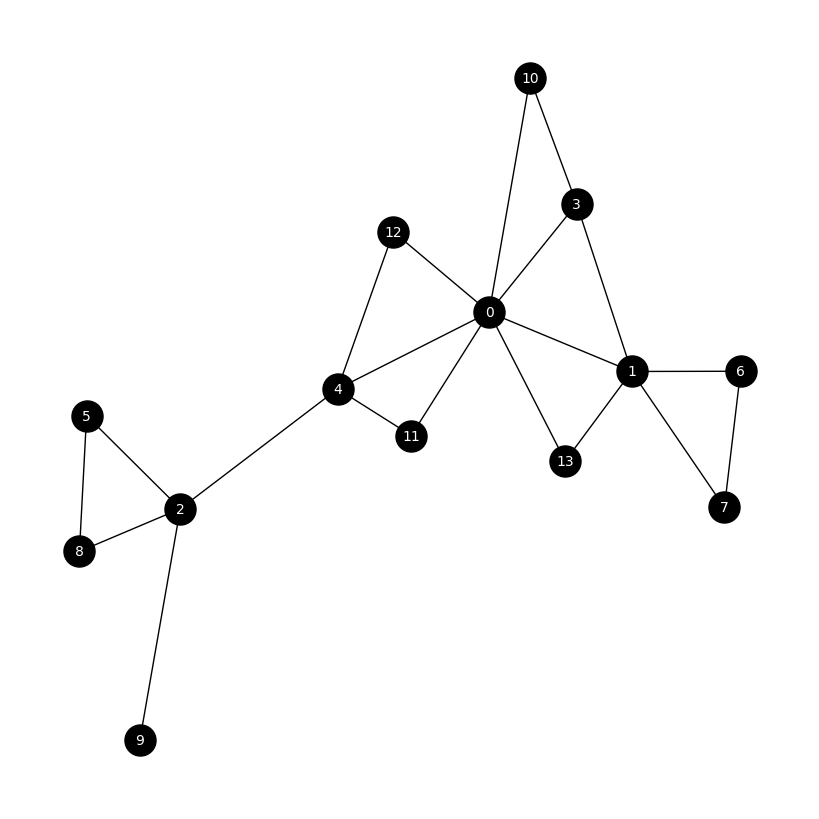

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

G = graph.create_nx_graph(graph.vertices)

# Draw the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="black",
    edge_color="black",
    font_color="white",
    node_size=500,
    font_size=10,
)
plt.show()
